In [59]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [72]:
city_file_location = '../Pyber/data/city_data.csv'
ride_file_location = '../Pyber/data/ride_data.csv'

# Read the City and Ride Data

city_data_df = pd.read_csv(city_file_location)
ride_data_df = pd.read_csv(ride_file_location)

# Combine the data into a single dataset

combined_data_df = pd.merge(city_data_df, ride_data_df, on = 'city', how='outer')
# Display the data table for preview

combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [110]:
# Obtain the x and y coordinates for each of the three city types
#NOT USED
# rides_df = combined_data_df.groupby(['city', 'type'])
# ridespercity = rides_df['ride_id'].count()
# ridespercity
# meanperride = rides_df['fare'].mean()
# meanperride

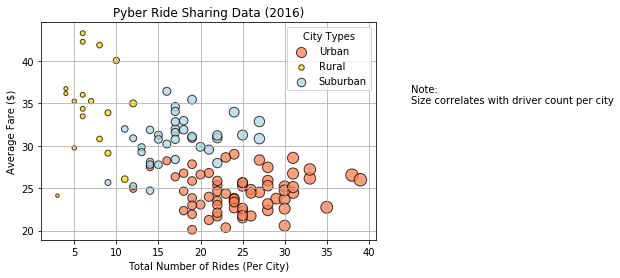

In [123]:
urbantrue = combined_data_df[(combined_data_df.type == 'Urban')]
urbanrides = urbantrue.groupby([combined_data_df.city]).count()['ride_id']
urbanfares = urbantrue.groupby([combined_data_df.city]).mean()['fare']

ruraltrue = combined_data_df[(combined_data_df.type == 'Rural')]
ruralrides = ruraltrue.groupby([combined_data_df.city]).count()['ride_id']
ruralfares = ruraltrue.groupby([combined_data_df.city]).mean()['fare']

suburbantrue = combined_data_df[(combined_data_df.type == 'Suburban')]
suburbanrides = suburbantrue.groupby([combined_data_df.city]).count()['ride_id']
suburbanfares = suburbantrue.groupby([combined_data_df.city]).mean()['fare']


plt.scatter(urbanrides, urbanfares, marker='o', facecolors='coral', edgecolors='black', alpha=0.75, s = urbanrides * 4, label = 'Urban')
plt.scatter(ruralrides, ruralfares, marker='o', facecolors='gold', edgecolors='black', alpha=0.75, s = ruralrides * 4, label='Rural')
plt.scatter(suburbanrides, suburbanfares, marker='o', facecolors='lightblue', edgecolors='black', alpha=0.75, s = suburbanrides * 4, label = 'Suburban')



note = ('Note:\n Circle size correlates with driver count per city')
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.annotate('Note:\nSize correlates with driver count per city', xy=(40, 35), xytext=(45,35))
plt.legend(title='City Types')
plt.grid()


plt.savefig("../Pyber/data/PyberRidesandAverages.png") 

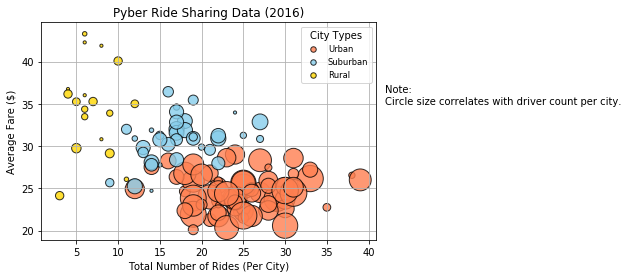

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


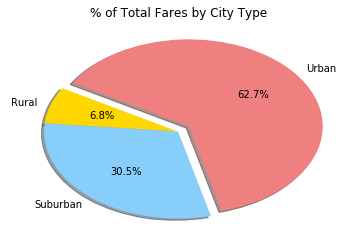

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


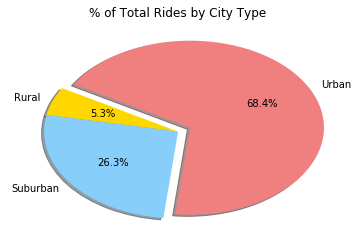

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


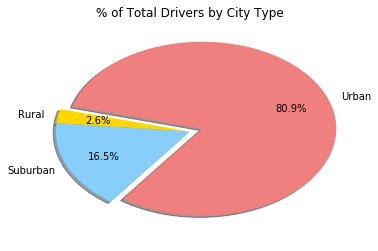

In [6]:
# Show Figure
plt.show()